<a href="https://colab.research.google.com/github/sujayrittikar/DeepLearning/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
housing_data = tf.keras.datasets.boston_housing

In [ ]:
(x_train, Y_train), (x_test, Y_test) = housing_data.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
print("x train shape: ", x_train.shape)
print("Y train shape: ", Y_train.shape)
print("x test shape: ", x_test.shape)
print("Y test shape: ", Y_test.shape)

x train shape:  (404, 13)
Y train shape:  (404,)
x test shape:  (102, 13)
Y test shape:  (102,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [ ]:
# Creating the DNN model for Regression
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation="relu", input_shape=(scaled_x_train[0].shape)))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="relu"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="rmsprop", loss=tf.keras.losses.mean_squared_error, metrics=['mae'])

In [ ]:
fitted = model.fit(scaled_x_train, Y_train, batch_size=10, epochs=100)

Epoch 1/100
41/41 [==============================] - 1s 1ms/step - loss: 339.5747 - mae: 15.3046
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 97.0859 - mae: 7.3386
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 60.9140 - mae: 5.5560
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 47.8374 - mae: 4.8435
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 41.0431 - mae: 4.4232
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 33.9811 - mae: 4.0492
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 29.8410 - mae: 3.7837
Epoch 8/100
41/41 [==============================] - 0s 1ms/step - loss: 26.7829 - mae: 3.6107
Epoch 9/100
41/41 [==============================] - 0s 1ms/step - loss: 24.3546 - mae: 3.3934
Epoch 10/100
41/41 [==============================] - 0s 1ms/step - loss: 23.2043 - mae: 3.3353
Epoch 11/100
41/41 [===========================

In [ ]:
model.evaluate(scaled_x_test, Y_test, batch_size=10)

11/11 [==============================] - 0s 1ms/step - loss: 31.7104 - mae: 4.1005


[31.710447311401367, 4.100528717041016]

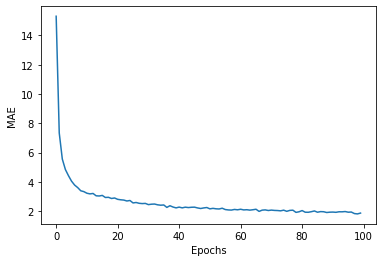

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fitted.history['mae'])
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.show()

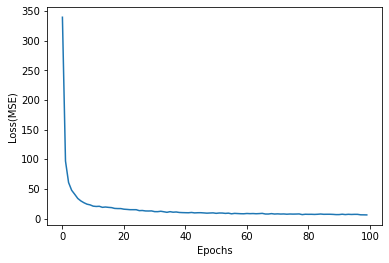

In [ ]:
plt.plot(fitted.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss(MSE)")
plt.show()